In [1]:
# Imports
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## For loading data
from pathlib import Path
from typing import Union

In [2]:
def load_dataset(path: Union[Path, str]) -> pd.DataFrame:
    return pd.read_csv(path, index_col=0)


def load_rankings(path: Union[Path, str]) -> pd.DataFrame:
    out = pd.read_csv(path, index_col=0, header=[0, 1, 2, 3])
    out.columns.name = ("dataset", "model", "tuning", "scoring")
    return out

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Load data

In [4]:
dir_data = '../../data/raw/'

# File names
filename_dataset = 'dataset.csv'
filename_ranking = 'rankings.csv'

# Create paths for given files
filepath_dataset = os.path.join(dir_data, filename_dataset)
filepath_ranking = os.path.join(dir_data, filename_ranking)

# Load data
dataset = load_dataset(filepath_dataset)
rankings = load_rankings(filepath_ranking)

## Take a first look at the data for dataset.csv

__dataset.cvs__

Information already given by the course: 
- Five features
- All features are categrical
  - dataset: OpenML id of the dataset
  - model: abbreviation of ML model
  - tuning: how the model was tuned
  - scoring: evaluation metric for the model
  - encoder: encoder used
  - cv_score: evaluation $\rightarrow$ target for Regression task


Idea/Analysis: 
- Basic steps: 
  - Take a look at the data
  - Null-values
  - Distributions / counts
  - Data types
- Get unique values of the features
- Which encoder failed most in total?
- Which encoder failed most for each dataset/model/tuning/scoring?
- Which encoder succeeded most in total?
- Which encoder succeeded most for each dataset/model/tuning/scoring?

In [5]:
dataset.shape

(48046, 6)

In [6]:
dataset.head()

,encoder,dataset,model,tuning,scoring,cv_score
0,BE,3,DTC,full,ACC,0.908341
1,BE,3,DTC,full,AUC,0.906854
2,BE,3,DTC,full,F1,0.916533
3,BE,3,DTC,model,ACC,0.967145
4,BE,3,DTC,model,AUC,0.967233


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48046 entries, 0 to 48045
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   encoder   48046 non-null  object 
 1   dataset   48046 non-null  int64  
 2   model     48046 non-null  object 
 3   tuning    48046 non-null  object 
 4   scoring   48046 non-null  object 
 5   cv_score  48046 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ MB


In [8]:
dataset.describe(include='object')

,encoder,model,tuning,scoring
count,48046,48046,48046,48046
unique,32,5,3,3
top,OE,LR,no,ACC
freq,1544,12240,22857,16018


In [9]:
dataset.describe()

,dataset,cv_score
count,48046.000000,48046.000000
mean,17687.281418,0.732593
std,20107.401067,0.232844
min,3.000000,0.000000
25%,470.000000,0.587383
50%,1506.000000,0.801851
75%,41162.000000,0.909264
max,43922.000000,1.000000


In [10]:
# Get unique values of the features
# Which encoder failed most in total?
# Which encoder failed most for each dataset/model/tuning/scoring?
# Which encoder succeeded most in total?
# Which encoder succeeded most for each dataset/model/tuning/scoring?

## Unique values

In [11]:
# Unique values
unique_encoders = dataset.encoder.unique()
unique_models = dataset.model.unique()
unique_tuning = dataset.tuning.unique()
unique_scoring = dataset.scoring.unique()

print(f"Unique encoders: {len(unique_encoders)}\n{unique_encoders}\n\n")
print(f"Unique models  : {len(unique_models)}\n{unique_models}\n\n")
print(f"Unique tuning  : {len(unique_tuning)}\n{unique_tuning}\n\n")
print(f"Unique scoring : {len(unique_scoring)}\n{unique_scoring}\n\n")

Unique encoders: 32
['BE' 'BUCV10RGLMME' 'BUCV10TE' 'BUCV2RGLMME' 'BUCV2TE' 'BUCV5RGLMME'
 'BUCV5TE' 'CBE' 'CE' 'CV10RGLMME' 'CV10TE' 'CV2RGLMME' 'CV2TE'
 'CV5RGLMME' 'CV5TE' 'DE' 'DTEM10' 'DTEM2' 'DTEM5' 'ME01E' 'ME10E' 'ME1E'
 'MHE' 'OE' 'OHE' 'PBTE0001' 'PBTE001' 'PBTE01' 'RGLMME' 'SE' 'TE' 'WOEE']


Unique models  : 5
['DTC' 'KNC' 'LGBMC' 'LR' 'SVC']


Unique tuning  : 3
['full' 'model' 'no']


Unique scoring : 3
['ACC' 'AUC' 'F1']




## Distribution of every feature

In [35]:
feature_set = list(dataset.columns)

In [38]:
feature_set[0]

'encoder'

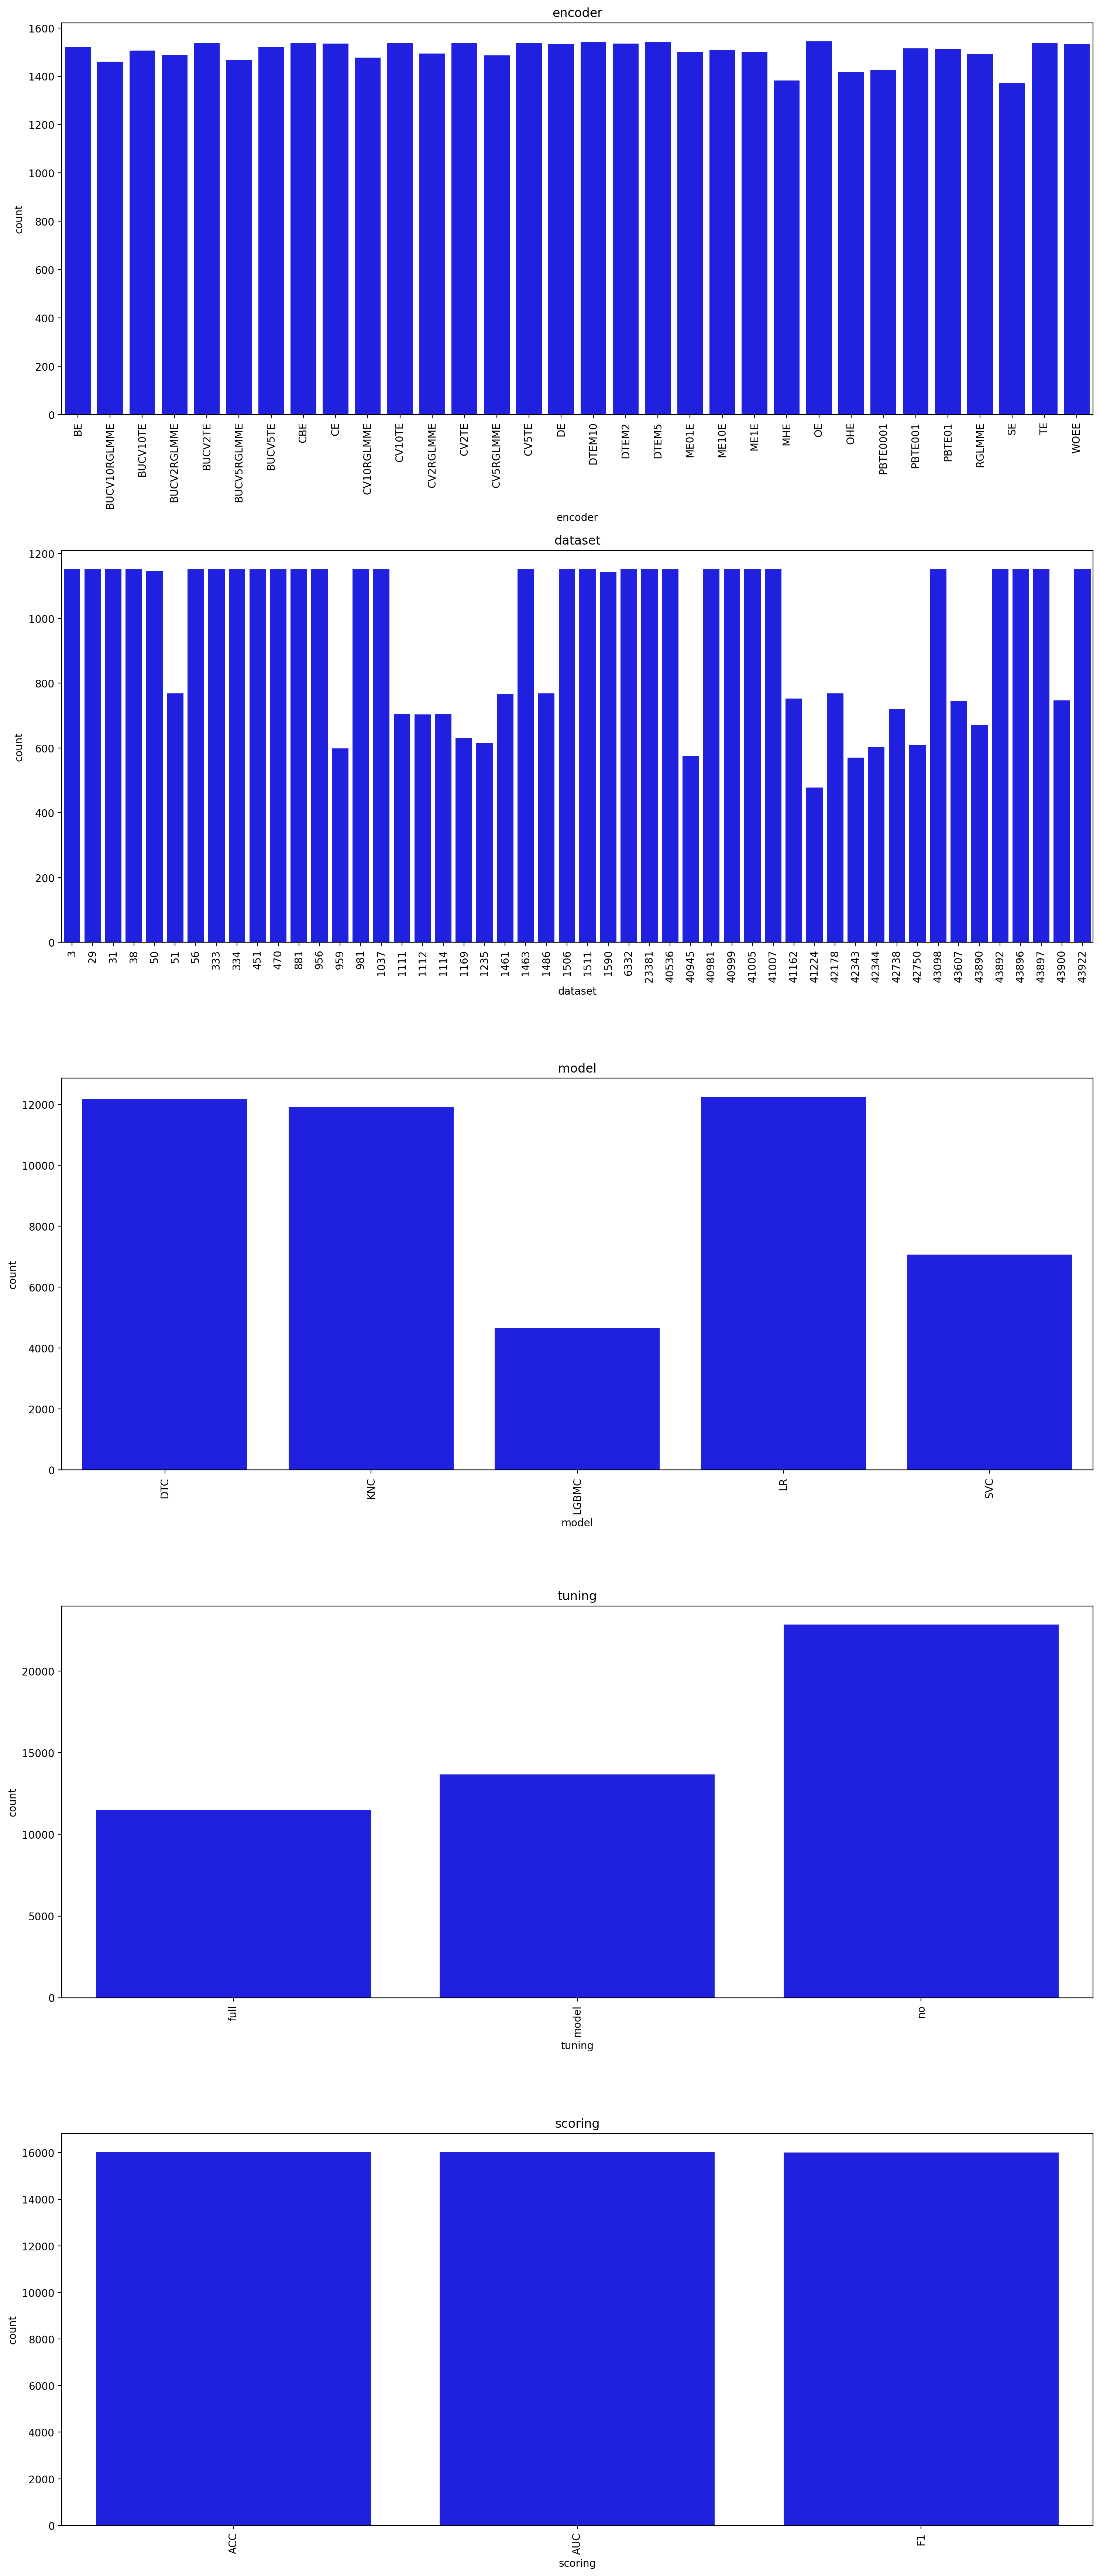

In [62]:
feature_set = list(dataset.columns)
feature_set.remove('cv_score')

counts = list()
idx = 0

NCOLS: int = 1
NROWS: int = 5

# Plot settings
fig, axes = plt.subplots(figsize=(15, 35), nrows=NROWS, ncols=NCOLS)
for feature, ax in zip(feature_set, axes.flatten()):
    # Group dataset
    sf = list()
    sf.append(feature_set[idx - 1])
    sf.append(feature_set[idx])
    
    tmp = dataset[sf].groupby([feature]).count().rename(columns={feature_set[idx - 1]: 'count'})
    tmp = tmp.reset_index()
    counts.append(tmp)
    
    # Plot counts
    g=sns.barplot(data=counts[idx], x=feature, y="count", color='b', ax=ax).set(title=feature)
    
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    
    # Increase counter 
    idx += 1
    
plt.tight_layout()
plt.show()

#### Findings

(More or less) equally distributed among: 
- encoders
- scoring

Not equally distributed: 
- datasets: About half of the datasets have about 1100 rows, the other half between 500 and 800. 
- models: 'DTC', 'KNC' and 'LR' all have about 12000 data points. But 'SVC' only about 7000 and 'LGBMC' about 5000. 
- tuning: 'full' has the fewest data points (11000), 'model' about 14000 and 'no' the most with > 20000

In [19]:
# Are the models / tuning / scoring equally distributed among the encoders?

#grouped_by_enc.count()
#dataset[(dataset.model == "DTC") & (dataset.encoder == 'BE')]
count_per_encoder_model = dataset[['encoder', 'model', 'dataset']].groupby(['encoder', 'model']).count().rename(columns={'dataset': 'count'})
count_per_encoder_model

count
encoder model       
BE      DTC      387
        KNC      369
        LGBMC    150
        LR       390
        SVC      225
...              ...
WOEE    DTC      390
        KNC      378
        LGBMC    150
        LR       390
        SVC      225

[160 rows x 1 columns]

In [ ]:
# Plot results
# 8 x 4 plots for each encoder

g = sns.barplot(result,  
                x="geo_level_1_id", 
                y="ratio",
                order=result.sort_values('ratio', ascending=False).geo_level_1_id)

for item in g.get_xticklabels():
    item.set_rotation(90)

### Conclusion for dataset.csv

- Five features (as already known and described above)
- No null-values
- Dataset ID is given as integer, but in fact categorical

In [ ]:

df.dataset.unique().shape

In [ ]:
df.dataset.unique()

In [ ]:
import pandas as pd

from pathlib import Path
from typing import Union

def load_rankings(path: Union[Path, str]) -> pd.DataFrame:
    out = pd.read_csv(path, index_col=0, header=[0, 1, 2, 3])
    out.columns.name = ("dataset", "model", "tuning", "scoring")
    return out

In [ ]:
rs = load_rankings('../../data/raw/rankings.csv')

In [ ]:
rs.head()

# Relationship between features

## Redundancies
At first we look for duplicate rows in order to drop them.

In [ ]:
print(f"Shape before dropping duplicates: {train_features.shape}")
train_features = train_features.drop_duplicates()
print(f"Shape after dropping duplicates : {train_features.drop_duplicates().shape}")

There is the same number of rows, so there are no duplicate rows.
If there were duplicates it would be interesting to see whether they have the same label. 

## Correlation
Correlation between the features, depending on the data type choose different measures

According to the documentation there are features of type:
- int
- binary (=bin)
- categorical (=cat)

I will test following measures for the respective combinations:

| Type 1 | Type 2 | Measure  |
|--------|--------|----------|
| int    | int    | Person   |
| int    | cat    | ANOVA, can also check scatter plot|
| int    | bin    | Point-Biserial |
| cat    | cat    | Contingency, Cramers V, Chi square |
| cat    | bin    |          |
| bin    | bin    | $\Phi$, Tetrachoric Correlation |

Links to some of the measures, to know where I found them:
- [Point-Biserial](https://researchbasics.education.uconn.edu/types_of_correlations/)
- [Point-Biserial example](https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1)
- [Tetrachoric Correlation](https://www.statology.org/correlation-between-categorical-variables/)
- [Cramers V](https://www.statology.org/correlation-between-categorical-variables/)
- [Contingency](https://researchbasics.education.uconn.edu/types_of_correlations/)
- [$\Phi$](https://researchbasics.education.uconn.edu/types_of_correlations/)
- [ANOVA](https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/)

A paper for the binary-binary case: [Properties of Binary Vector Dissimilarity Measures](https://cedar.buffalo.edu/papers/articles/CVPRIP03_propbina.pdf)

And also try to encode the categorical features and handle them just as numerical ones. 

In [ ]:
# Define lists of features according to their datatype in the documentation
int_features = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "count_floors_pre_eq", "age", "area_percentage", "height_percentage", "count_families"]
cat_features = ["land_surface_condition", "foundation_type", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]
bin_features = ["has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", "has_superstructure_cement_mortar_brick", "has_superstructure_timber", "has_superstructure_bamboo", "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered", "has_superstructure_other", "has_secondary_use", "has_secondary_use_agriculture", "has_secondary_use_hotel", "has_secondary_use_rental", "has_secondary_use_institution", "has_secondary_use_school", "has_secondary_use_industry", "has_secondary_use_health_post", "has_secondary_use_gov_office", "has_secondary_use_use_police", "has_secondary_use_other"]

In [ ]:
# Sanity check: Do I have all features in the lists above?
# - 1 because of building_id, which is the identifier
print(len(int_features) + len(cat_features) + len(bin_features) == len(train_features.columns) - 1)

### Define functions

In [ ]:
def plot_pearson_corr_heatmap(data=None, features_x_axis=None, features_y_axis=None):
    """
    Calculates the pearson correlation of all features and plots them in a heatmap. 
    
    :param data: Dataframe with features and values
    :param features_x_axis: The features to plot on the x axis
    :param features_y_axis: The features to plot on the y axis
    """
    # assert: data not None
    # ToDo: Check if feature sets are in the dataframe
    
    # Calculate and show correlation matrix
    corr_matrix = data.corr()

    # Set features for axis
    if features_x_axis is None: 
        features_x_axis = list(data.columns)
    if features_y_axis is None:
        features_y_axis = list(data.columns)
    
    # Plot correlations4
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix[features_x_axis].loc[features_y_axis], annot=True, cmap=plt.cm.Reds)
    plt.show()

In [ ]:
def plot_cramers_v_corr_heatmap(data=None, features_x_axis=None, features_y_axis=None, annotate_map=True):
    """
    Calculates the cramers V correlation of all features and plots them in a heatmap. 
    Cramers V is based on Chi square, for reference see: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    Note that this function is desined to work for categorical features only!
    Code was copied and modified from this source: https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook
    
    :param data: Dataframe with features and values
    :param features_x_axis: The features to plot on the x axis
    :param features_y_axis: The features to plot on the y axis
    """
    # Encode features
    label = preprocessing.LabelEncoder()
    data_encoded = pd.DataFrame() 

    for i in data.columns :
        data_encoded[i]=label.fit_transform(data[i])

    # Internal function to calculate cramers V for two features
    def _cramers_V(var1, var2) :
        crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))  # Cross table building
        stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
        obs = np.sum(crosstab)  # Number of observations
        mini = min(crosstab.shape) - 1  # Take the minimum value between the columns and the rows of the cross table
        return (stat / (obs * mini))
        #return stat

    # Calculate values for each pair of features
    rows= []
    for var1 in data_encoded:
        col = []
        for var2 in data_encoded :
            cramers = _cramers_V(data_encoded[var1], data_encoded[var2])  # Cramer's V test
            col.append(round(cramers, 4))  # Keeping of the rounded value of the Cramer's V  
        rows.append(col)
    
    # Create a pandas df from the results
    cramers_results = np.array(rows)
    cramers_v_corr_matrix = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
    
    # Set features for axis
    if features_x_axis is None: 
        features_x_axis = list(data.columns)
    if features_y_axis is None:
        features_y_axis = list(data.columns)
    
    # Plot correlations
    plt.figure(figsize=(8,6))
    sns.heatmap(cramers_v_corr_matrix[features_x_axis].loc[features_y_axis], annot=annotate_map, cmap=plt.cm.Reds)
    plt.show()

### Correlation between int-int features

In [ ]:
plot_pearson_corr_heatmap(data=train_features[int_features])

We can see a high correlation between ´´height_percentage´´ and ´´count_floors_pre_eq´´.
So there is redundant information and we can drop one of the features. 

### Correlation between int-cat features

Here I will use ANOVA, which basically checks if there are any significant differences between the means of the values of the numeric variable for each categorical value.

ANOVA has the Null-hypothesis, that the variables are not correlated with each other. 
- The p-value indicates the probability, that the Null-hypothesis is true. 
- So we can choose a confidence level e.g. 0.05. 
- If the p-value > 0.05 means variables are NOT correlated. 
- If the p-value < 0.05 means variables are correlated.

In [ ]:
rows = []
cat_col = []
num_col = []
f_col = []
p_col = []

for category in cat_features:
    for num_feature in int_features:
        group_list = train_features.groupby(category)[num_feature].apply(list)
        res = f_oneway(*group_list)
        rows.append([category, num_feature, res[0], float(res[1])])
        
        if res[1] >= 0.05:
            print(f"{category} - {num_feature}")
        
# Create a pandas df from the results
anova_results = np.array(rows)
anova_results_df = pd.DataFrame(anova_results, columns=["categorical_feature", "numerical_feature", "f_statistics", "p_value"])

# Also show results
anova_results_df.head(len(int_features) * len(cat_features))

Since the p-value of EVERY(!) combination is 0 or almost 0 this means that they are all correlated!

This doesn't make sense, therefore I will look closer

In [ ]:
# Dynamically set size of subplots
columns: int = 4
rows: int = math.ceil((len(cat_features) * len(int_features))/columns)

# Plot settings
fig, axes = plt.subplots(figsize=(15, 60), nrows=rows, ncols=columns)
#fig.suptitle("Boxplots for relationship between categorical and numerical features", size=18)

# Index for axes
i = 0

# Iterate over feature combinations
for category in cat_features:
    for num_feature in int_features:
        g = sns.boxplot(data=train_features, x=category, y=num_feature, ax=axes.flatten()[i])
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
# Create a copy of the data set because the data types will be changed
data = train_features[cat_features + int_features].copy()

for feature in cat_features:
    data[feature] = data[feature].astype('category').cat.codes

# Calculate and show correlation matrix
corr_matrix = data.corr()

# Plot correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix[cat_features].loc[int_features], annot=True, cmap=plt.cm.Reds)
plt.show()

I found it pretty hard to analyze this kind of feature combination. 
The only measure I found is ANOVA and it suggests, that every combination of categorical and numerical feature is correlated. 

Therefore, I tried: 
- Encoding the categorical features and calculate standard pearson. This led to no significant correlation, but it also depends on the encoding of the features.
- Analyzing boxplots: Most of the numerical values are (more or less) equally or at least similar distibuted among the categories.

### Correlation between int-bin features

In [ ]:
# Calculate point biserial correlation (in this case it is equal to pearson correlation)
rows = []
for bin_feature in bin_features:
    col = []
    for int_feature in int_features:
        pbc = pointbiserialr(train_features[bin_feature], train_features[int_feature])
        col.append(round(pbc[0], 4))
    rows.append(col)    
    
pbc_results = np.array(rows)
pbc_corr_matrix = pd.DataFrame(pbc_results, columns = int_features, index = bin_features)
    
# Plot correlations
plt.figure(figsize=(8,6))
sns.heatmap(pbc_corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

We can see, that there is no high correlation between any of the features

### Correlation between cat-cat features

In [ ]:
plot_cramers_v_corr_heatmap(train_features[cat_features])

In [ ]:
for f1 in cat_features:
    for f2 in cat_features:
        phi = matthews_corrcoef(train_features[f1], train_features[f2])
        if phi > 0.5 and f1 != f2:
            print(f"'{f1}' - '{f2}': {phi}")

There is no high correlation between any of the features.

### Correlation between cat-bin features

In [ ]:
plot_cramers_v_corr_heatmap(train_features[cat_features + bin_features], 
                            features_x_axis=cat_features, 
                            features_y_axis=bin_features)

In [ ]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for c in train_features.columns:
    if c in cat_features:
        data_encoded[c] = label.fit_transform(train_features[c])
    else:
        data_encoded[c] = train_features[c]

for f1 in bin_features:
    for f2 in cat_features:
        phi = matthews_corrcoef(data_encoded[f1], data_encoded[f2])
        if phi > 0.5 and f1 != f2:
            print(f"'{f1}' - '{f2}': {phi}")

There is no high correlation between any of those features. 

### Correlation between bin-bin features

In [ ]:
plot_cramers_v_corr_heatmap(train_features[bin_features], annotate_map=False)

Now I will test also a different measure: $\Phi$ aka. matthews_correlation

According to [this post](https://junye0798.com/post/everythin-you-need-to-know-about-correlation/) tetrachoric correlation is not quite so general. 

In [ ]:
for f1 in bin_features:
    for f2 in bin_features:
        phi = matthews_corrcoef(train_features[f1], train_features[f2])
        if phi > 0.5 and f1 != f2:
            print(f"'{f1}' - '{f2}': {phi}")

So there is a high correlation between 'has_secondary_use' and 'has_secondary_use_agriculture' (MCC: 0.739). 
And also a smaller correlation between 'has_secondary_use' and ' has_secondary_use_hotel' (MCC: 0.526)